In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

<img src="../plots/illust/model.jpg" width="500" height="250" alt="https://courses.cs.ut.ee/LTAT.02.002/2022_fall/uploads/Main/IDS2022_lecture_09_machine_learning_4.pdf" />

In [2]:
X = np.linspace(-1, 1, 1000)
y = X**2

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True) 

In [3]:
model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=1, activation='linear'),
])

model.summary()
model.weights

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


[<tf.Variable 'dense/kernel:0' shape=(1, 8) dtype=float32, numpy=
 array([[ 0.38527346,  0.5549176 ,  0.13537699, -0.56229293, -0.3039456 ,
         -0.3696766 ,  0.64356697,  0.45087922]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[ 0.10248816, -0.244156  ,  0.46438342,  0.12101239],
        [-0.08522397,  0.03735459, -0.590593  , -0.40959117],
        [ 0.4874156 ,  0.24781555,  0.54544467,  0.24487978],
        [ 0.49831706,  0.29921728,  0.05750889,  0.44502908],
        [-0.43498716, -0.03480452,  0.31922358, -0.5640479 ],
        [-0.3224753 , -0.19836634, -0.08719289,  0.23257893],
        [-0.0806033 , -0.14545637,  0.6551662 ,  0.55752474],
        [ 0.55582017, -0.47883254,  0.31984824,  0.24637175]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.],

In [4]:
def model_creator(a, b):
    model = keras.Sequential([
        layers.Input(shape=(1,)),
        layers.Dense(units=a, activation='relu'),
        layers.Dense(units=b, activation='relu'),
        layers.Dense(units=1, activation='linear'),
    ])

    callback = keras.callbacks.EarlyStopping(monitor='loss', patience=20)

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
        #optimizer=keras.optimizers.Adam(learning_rate=0.2, amsgrad=True),
        # Loss function to minimize
        loss=keras.losses.MeanSquaredError(),
        # List of metrics to monitor
        metrics=[keras.metrics.MeanSquaredError()],
    )
    h = model.fit(X, y, batch_size=64, epochs=2000, verbose=2,
                  validation_data=(X_valid, y_valid), callbacks=[callback])
    return model, h


In [4]:

# See cell ei ole iga kord samade kaaludega treenitud mudel.
# Algne mudel on sama
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=20)

model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.8),
    #optimizer=keras.optimizers.Adam(learning_rate=0.2, amsgrad=True),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=64, epochs=1000, verbose=0,
                callbacks=[callback], )#validation_data=(X_valid, y_valid))

32/32 [==============================] - 0s 3ms/step


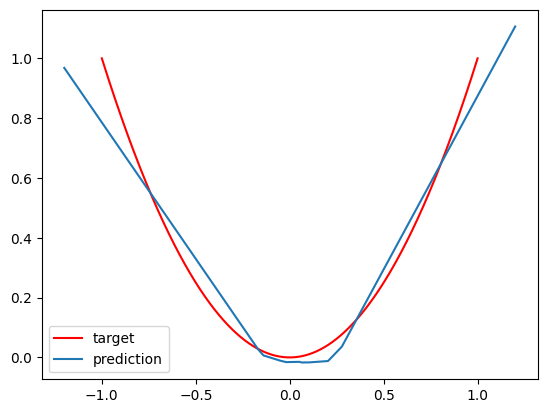

In [6]:
X_pred = np.linspace(-1.2, 1.2, 1000)

plt.plot(X, y, color='red', label="target")
plt.plot(X_pred, model.predict(X_pred), label="prediction")
plt.legend()

In [7]:
model.save('../models/model1')

INFO:tensorflow:Assets written to: ../models/model1\assets


In [8]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 8) dtype=float32, numpy=
 array([[ 0.41373074,  0.5078888 ,  0.17651995, -0.7674029 , -0.22934695,
         -0.3869313 ,  0.70177543,  0.48365617]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([-0.02197471,  0.05318192, -0.03224742, -0.01435835, -0.00762291,
        -0.00642476, -0.05032409, -0.02517649], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[ 0.10609227, -0.24417783,  0.4822526 ,  0.1421023 ],
        [-0.08047246,  0.03734267, -0.56804526, -0.38408446],
        [ 0.48884687,  0.24781555,  0.5527657 ,  0.25376856],
        [ 0.5219179 ,  0.39147648,  0.18049358,  0.5949023 ],
        [-0.42555705,  0.00234019,  0.36860022, -0.50377125],
        [-0.30908054, -0.14581597, -0.01726792,  0.31789044],
        [-0.07453649, -0.1454827 ,  0.6854076 ,  0.59334785],
        [ 0.56003946, -0.47884494,  0.34073702,  0.2710169 ]],
       dtype=float32)>,
 <tf

In [9]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 8) dtype=float32, numpy=
 array([[ 0.41373074,  0.5078888 ,  0.17651995, -0.7674029 , -0.22934695,
         -0.3869313 ,  0.70177543,  0.48365617]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([-0.02197471,  0.05318192, -0.03224742, -0.01435835, -0.00762291,
        -0.00642476, -0.05032409, -0.02517649], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[ 0.10609227, -0.24417783,  0.4822526 ,  0.1421023 ],
        [-0.08047246,  0.03734267, -0.56804526, -0.38408446],
        [ 0.48884687,  0.24781555,  0.5527657 ,  0.25376856],
        [ 0.5219179 ,  0.39147648,  0.18049358,  0.5949023 ],
        [-0.42555705,  0.00234019,  0.36860022, -0.50377125],
        [-0.30908054, -0.14581597, -0.01726792,  0.31789044],
        [-0.07453649, -0.1454827 ,  0.6854076 ,  0.59334785],
        [ 0.56003946, -0.47884494,  0.34073702,  0.2710169 ]],
       dtype=float32)>,
 <tf

# 2-2

Epoch 1/2000
16/16 - 1s - loss: 0.4604 - mean_squared_error: 0.4604 - val_loss: 0.4001 - val_mean_squared_error: 0.4001 - 1s/epoch - 78ms/step
Epoch 2/2000
16/16 - 0s - loss: 0.2797 - mean_squared_error: 0.2797 - val_loss: 0.2419 - val_mean_squared_error: 0.2419 - 83ms/epoch - 5ms/step
Epoch 3/2000
16/16 - 0s - loss: 0.1805 - mean_squared_error: 0.1805 - val_loss: 0.1778 - val_mean_squared_error: 0.1778 - 99ms/epoch - 6ms/step
Epoch 4/2000
16/16 - 0s - loss: 0.1435 - mean_squared_error: 0.1435 - val_loss: 0.1524 - val_mean_squared_error: 0.1524 - 94ms/epoch - 6ms/step
Epoch 5/2000
16/16 - 0s - loss: 0.1284 - mean_squared_error: 0.1284 - val_loss: 0.1410 - val_mean_squared_error: 0.1410 - 94ms/epoch - 6ms/step
Epoch 6/2000
16/16 - 0s - loss: 0.1214 - mean_squared_error: 0.1214 - val_loss: 0.1344 - val_mean_squared_error: 0.1344 - 91ms/epoch - 6ms/step
Epoch 7/2000
16/16 - 0s - loss: 0.1169 - mean_squared_error: 0.1169 - val_loss: 0.1298 - val_mean_squared_error: 0.1298 - 90ms/epoch - 6m

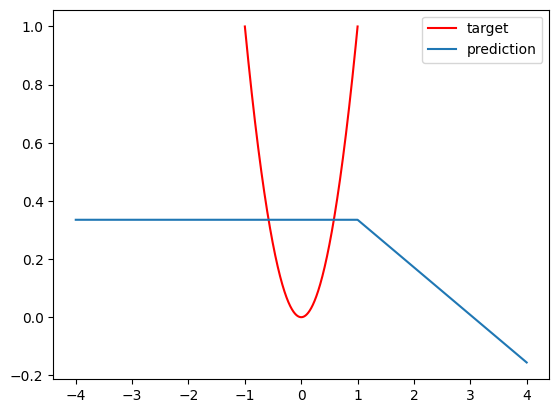

In [33]:
model, h = model_creator(2, 2)
#plt.plot(h.history['loss'], label='train')
#plt.plot(h.history['val_loss'], label='val')

X_pred = np.linspace(-4, 4, 1000)

plt.plot(X, y, color='red', label="target")
plt.plot(X_pred, model.predict(X_pred), label="prediction")
plt.legend()

# 5-5

32/32 [==============================] - 0s 2ms/step


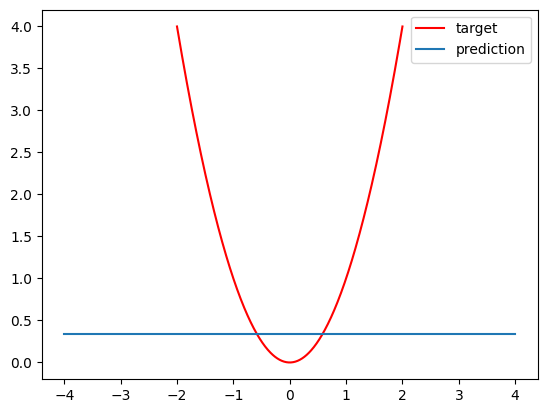

In [31]:
model, h = model_creator(5, 5)
# plt.plot(h.history['loss'], label='train')
# plt.plot(h.history['val_loss'], label='val')

X_pred = np.linspace(-4, 4, 1000)

X_plot = np.linspace(-2, 2, 500)
plt.plot(X_plot, X_plot**2, color='red', label="target")
plt.plot(X_pred, model.predict(X_pred), label="prediction")
plt.legend()


a
b

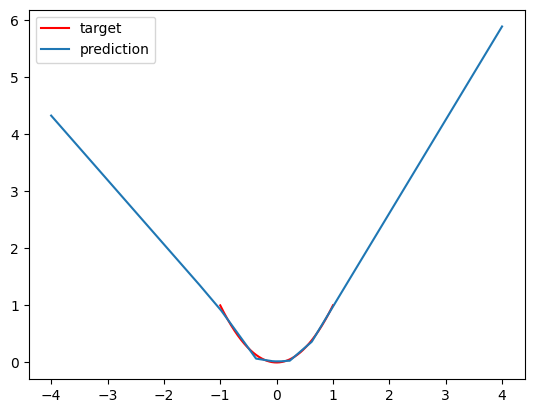

In [34]:
model, h = model_creator(10, 6)
#plt.plot(h.history['loss'], label='train')
#plt.plot(h.history['val_loss'], label='val')

X_pred = np.linspace(-4, 4, 1000)

plt.plot(X, y, color='red', label="target")
plt.plot(X_pred, model.predict(X_pred), label="prediction")
plt.legend()

32/32 [==============================] - 1s 32ms/step


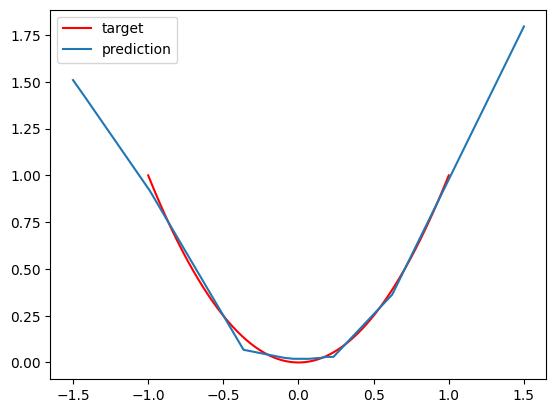

In [36]:
X_pred = np.linspace(-1.5, 1.5, 1000)

plt.plot(X, y, color='red', label="target")
plt.plot(X_pred, model.predict(X_pred), label="prediction")
plt.legend()

In [39]:
model.weights

[<tf.Variable 'dense_30/kernel:0' shape=(1, 10) dtype=float32, numpy=
 array([[ 0.7244722 ,  0.01444252, -0.49447966,  0.29138467,  0.757699  ,
         -0.08187928,  0.4420582 , -0.80244863, -0.01725879,  0.11816814]],
       dtype=float32)>,
 <tf.Variable 'dense_30/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.13174674,  0.00985826, -0.02039313, -0.01248417, -0.10863401,
        -0.08207026, -0.03094356, -0.08059635, -0.0176501 ,  0.17155956],
       dtype=float32)>,
 <tf.Variable 'dense_31/kernel:0' shape=(10, 6) dtype=float32, numpy=
 array([[ 0.4092955 ,  0.38690025,  0.518123  ,  0.40316656,  0.01696601,
          0.5500842 ],
        [ 0.28571808, -0.15107158, -0.54731476, -0.21034606,  0.3549023 ,
          0.04300219],
        [ 0.24941653, -0.45073086, -0.46206626, -0.3183413 , -0.22774196,
          0.63012755],
        [-0.08064711, -0.279743  ,  0.15478553, -0.16461302, -0.44974437,
         -0.15858163],
        [-0.37271553, -0.0541814 ,  0.6684427 , -0.244093  , 

# Üritamine aru saada hea v halb

In [81]:
model.weights # suhteliselt kehva, 2 lõikepunkti

[<tf.Variable 'dense_68/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[-3.1419613, -2.319747 ]], dtype=float32)>,
 <tf.Variable 'dense_68/bias:0' shape=(2,) dtype=float32, numpy=array([-1.0248997, -2.3404748], dtype=float32)>,
 <tf.Variable 'dense_69/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-2.1525636, -1.4496899],
        [ 1.0831127, -1.6253964]], dtype=float32)>,
 <tf.Variable 'dense_69/bias:0' shape=(2,) dtype=float32, numpy=array([-1.274775, -2.441425], dtype=float32)>,
 <tf.Variable 'dense_70/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-1.459294  ],
        [ 0.76472414]], dtype=float32)>,
 <tf.Variable 'dense_70/bias:0' shape=(1,) dtype=float32, numpy=array([-0.37390167], dtype=float32)>]

In [86]:
model.weights # palju parem, 3 lõikepunkti

[<tf.Variable 'dense_71/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[-1.3606579 , -0.94677347]], dtype=float32)>,
 <tf.Variable 'dense_71/bias:0' shape=(2,) dtype=float32, numpy=array([0.04324305, 0.9471695 ], dtype=float32)>,
 <tf.Variable 'dense_72/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 0.19500919,  1.4743755 ],
        [ 0.12231153, -1.3638425 ]], dtype=float32)>,
 <tf.Variable 'dense_72/bias:0' shape=(2,) dtype=float32, numpy=array([-0.9137885 ,  0.91517353], dtype=float32)>,
 <tf.Variable 'dense_73/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-0.9970616],
        [ 2.1649446]], dtype=float32)>,
 <tf.Variable 'dense_73/bias:0' shape=(1,) dtype=float32, numpy=array([-0.04773809], dtype=float32)>]

In [9]:
endings2 = []
for i in range(50):
    print(i)
    model = keras.Sequential([
        layers.Input(shape=(1,)),
        layers.Dense(units=2, activation='relu'),
        layers.Dense(units=2, activation='relu'),
        layers.Dense(units=1, activation='linear'),
    ])
    callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
        #optimizer=keras.optimizers.Adam(learning_rate=0.2, amsgrad=True),
        # Loss function to minimize
        loss=keras.losses.MeanSquaredError(),
        # List of metrics to monitor
        metrics=[keras.metrics.MeanSquaredError()],
    )
    h = model.fit(X, y, batch_size=128, epochs=200,
                  verbose=False, callbacks=[callback])
    endings2.append(h.history['loss'][-1])


0
1
2
3
4
5
6
7
8
9
10


(array([38.,  1.,  1.,  1.,  1.,  0.,  0.,  5.,  0.,  3.]),
 array([0.00011182, 0.00904057, 0.01796932, 0.02689806, 0.03582681,
        0.04475556, 0.05368431, 0.06261306, 0.0715418 , 0.08047055,
        0.0893993 ]),
 <BarContainer object of 10 artists>)

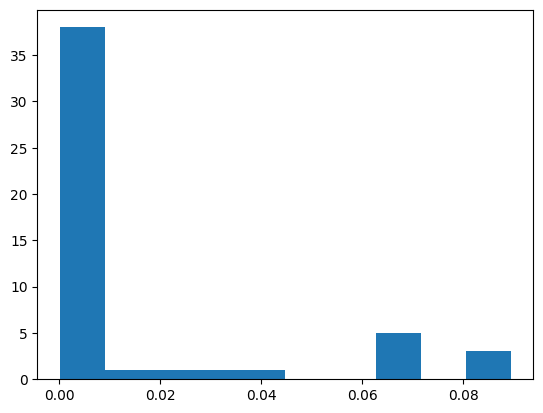

In [8]:
endings = sorted(endings)
plt.hist(endings)

endings2 = sorted(endings2)
plt.hist(endings2)

# Niisama ideed
1. aga mis siis kui paneks relu layer, 1 linear layer, repeat, kas erinevates kohtades asju vaadates saab targemaks?